In [1]:
#The jupyter notebook for credit card fraud detection dataset.
# Claire Hu
#

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# STEP 1: ############### data preprocessing ###################

#Notes: difference between sb vs mb
#Notes: sklearn vs numpy
#Notes: pandas vs numpy.
#

input_file = 'creditcard.csv'
layout = ["Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"]

dataset = pd.read_csv(input_file)
print(dataset)



            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -1.221637  0.383930 -1.234899 -1.48

In [2]:
# overview of the data.
dataset.describe() #equivalent to summary in R
# No equivalent of str(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
# data transformation
dataset['Class'] = dataset['Class'].astype('category')

# check NA
dataset.isnull().values.any()

False

0    284315
1       492
Name: Class, dtype: int64


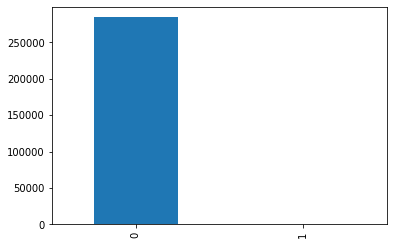

In [4]:


fig, ax = plt.subplots()

# target variable distribution
print(dataset['Class'].value_counts())
dataset['Class'].value_counts().plot(ax=ax, kind='bar')

Class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Time, dtype: object

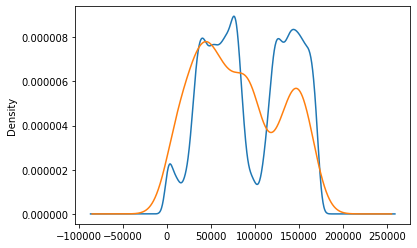

In [5]:
# time distribution
dataset.groupby('Class').Time.plot(kind='kde') #by class

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

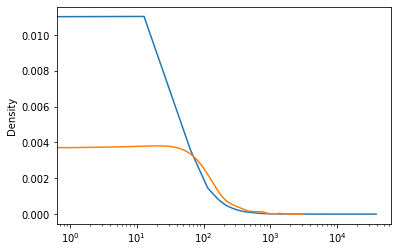

In [6]:
#amount distribution
dataset.groupby('Class').Amount.plot(kind='kde', logx=True) #by class
dataset["Amount"].describe()

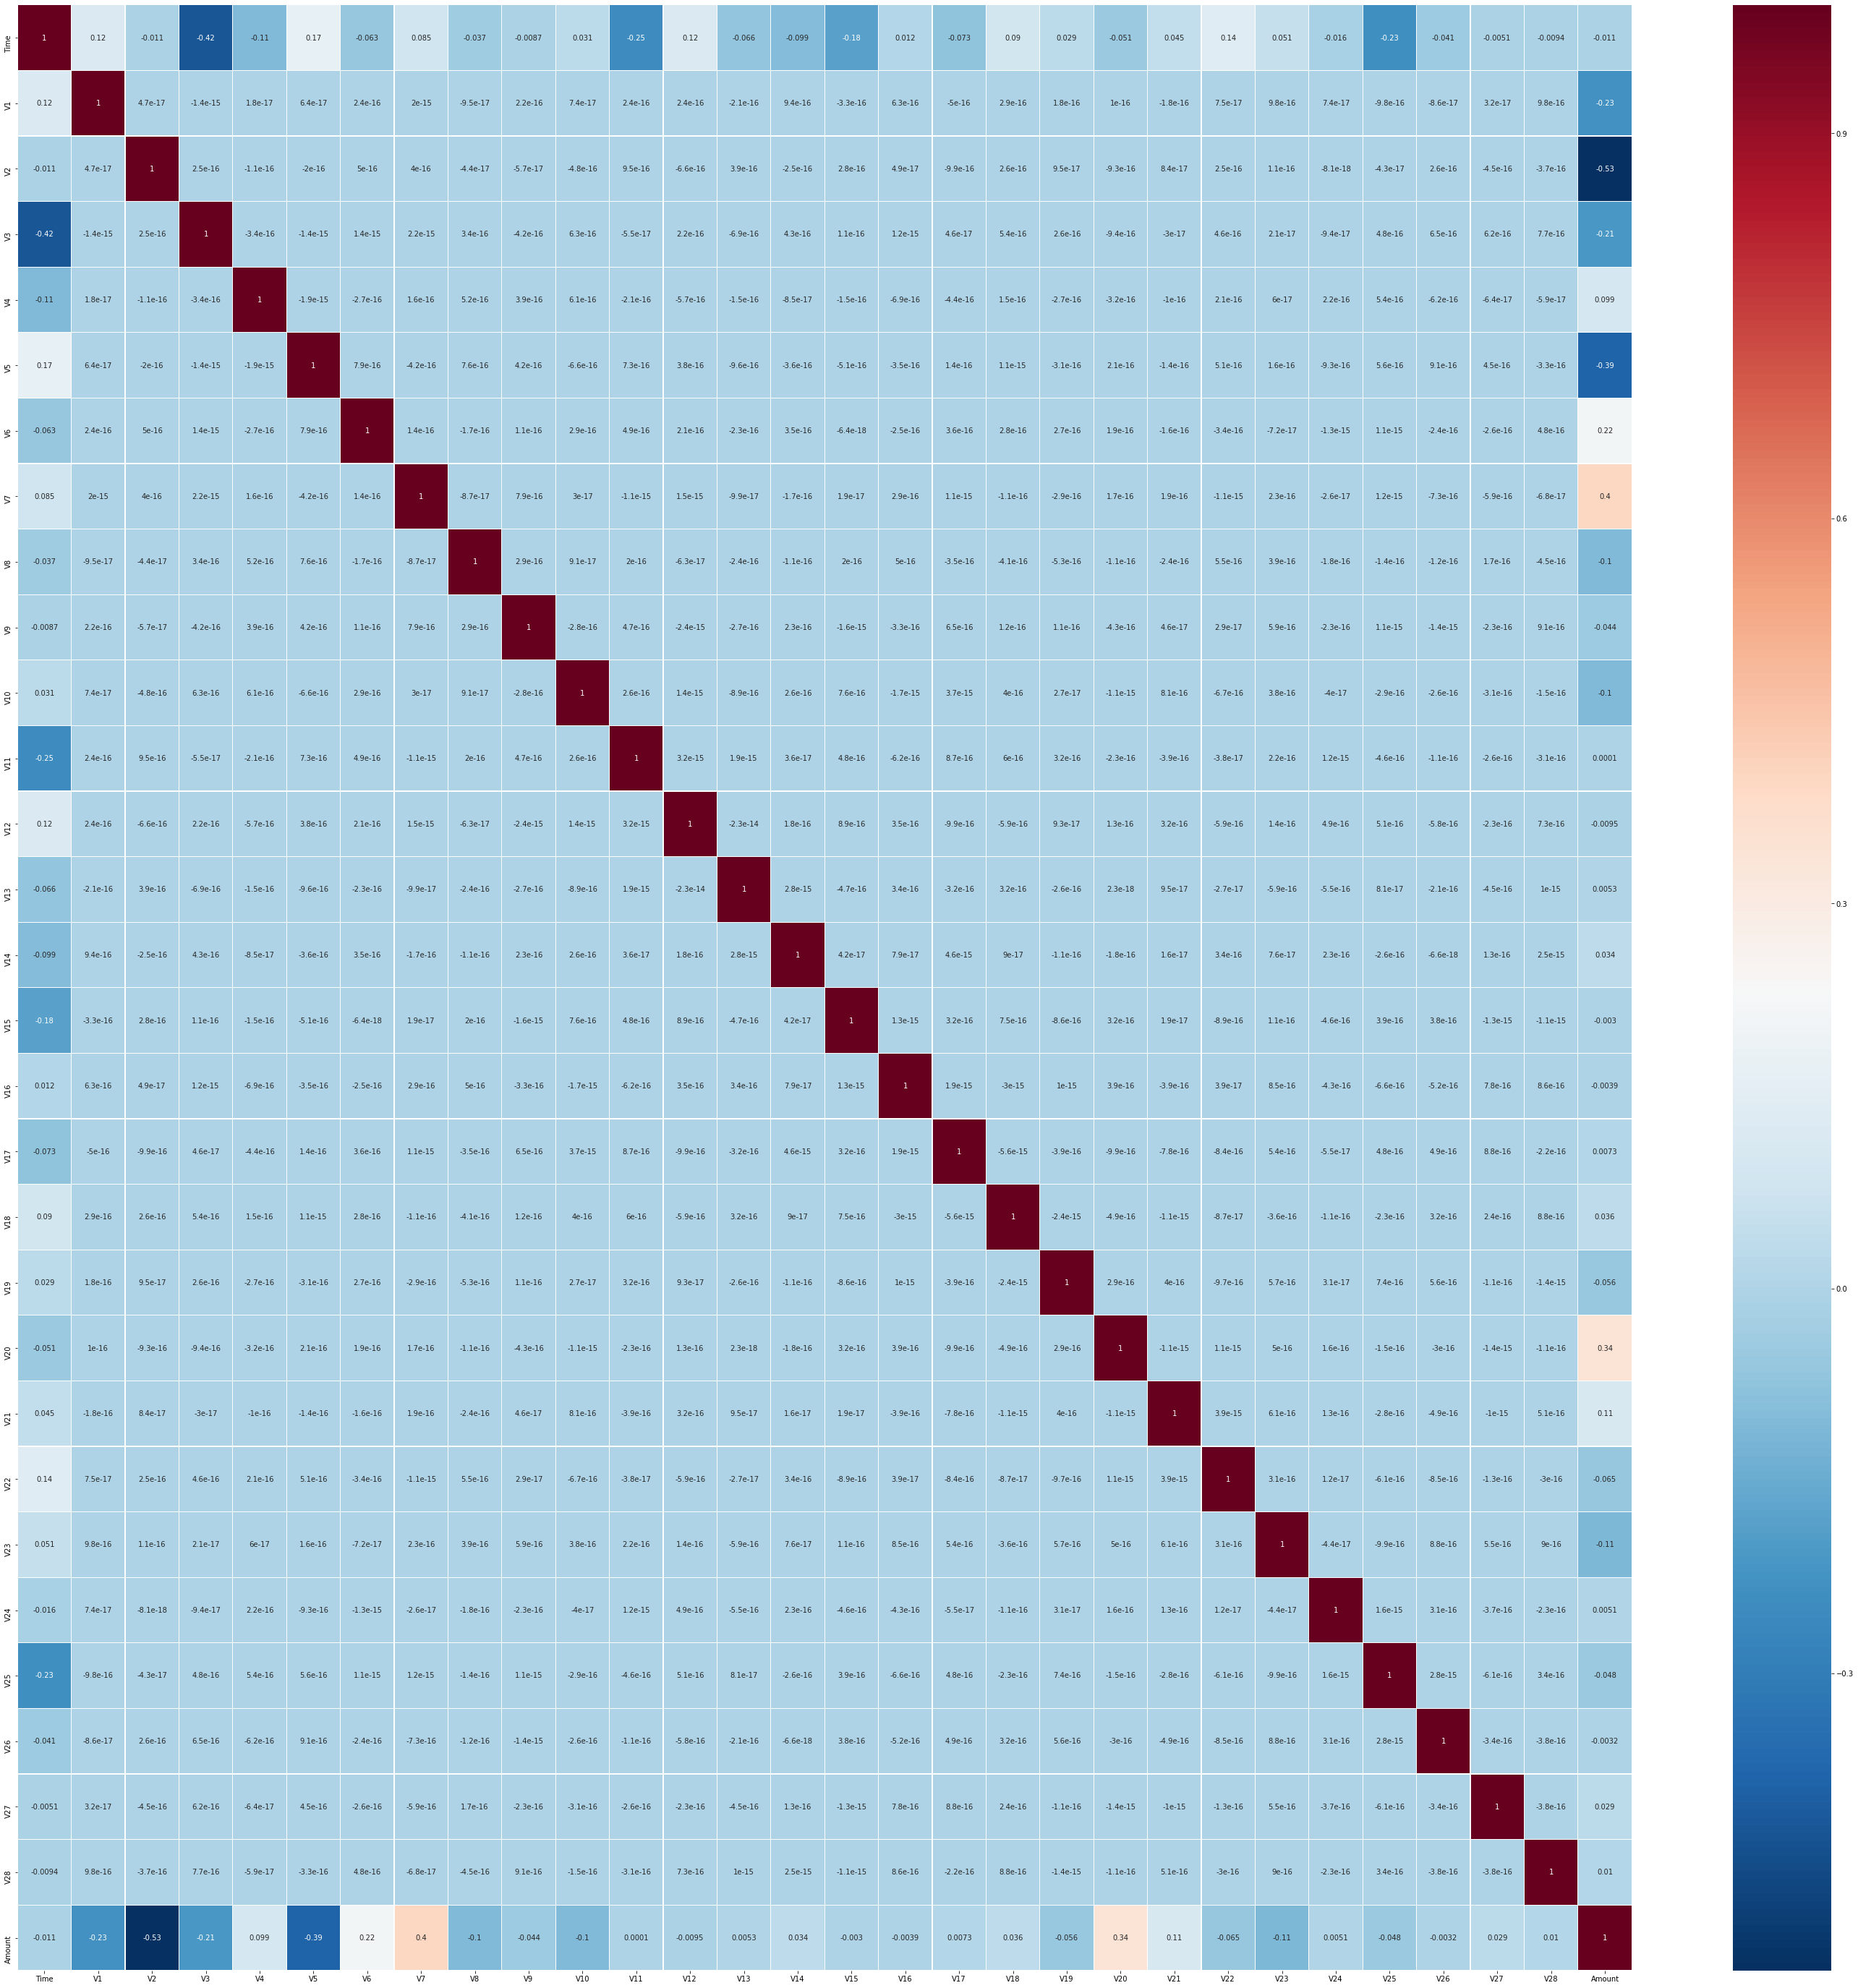

In [7]:
# correlations
pearson_results = dataset.corr(method='pearson')

fig, ax = plt.subplots(figsize=(50,50))         # Sample figsize in inches

sb.heatmap(pearson_results, 
            xticklabels=pearson_results.columns,
            yticklabels=pearson_results.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.1,
            ax=ax)

In [8]:
#######################################################
################ build classifiers ###################
#######################################################

import numpy as np
# Split data
np.random.seed(888)
msk = np.random.rand(len(dataset)) <= 0.666
train = dataset[msk]
test = dataset[~msk]
print(train['Class'].value_counts(), len(train))
print(test['Class'].value_counts(), len(test))


0    189458
1       325
Name: Class, dtype: int64 189783
0    94857
1      167
Name: Class, dtype: int64 95024


In [9]:
#################### Decision Tree ######################
from sklearn.tree import DecisionTreeClassifier, export_graphviz

features = list(dataset.columns[:-1])
print(features)
y = train["Class"]
X = train[features]
model_DecisionTree_v01 = DecisionTreeClassifier(min_samples_split=20, random_state=99)
model_DecisionTree_v01.fit(X, y)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

//anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


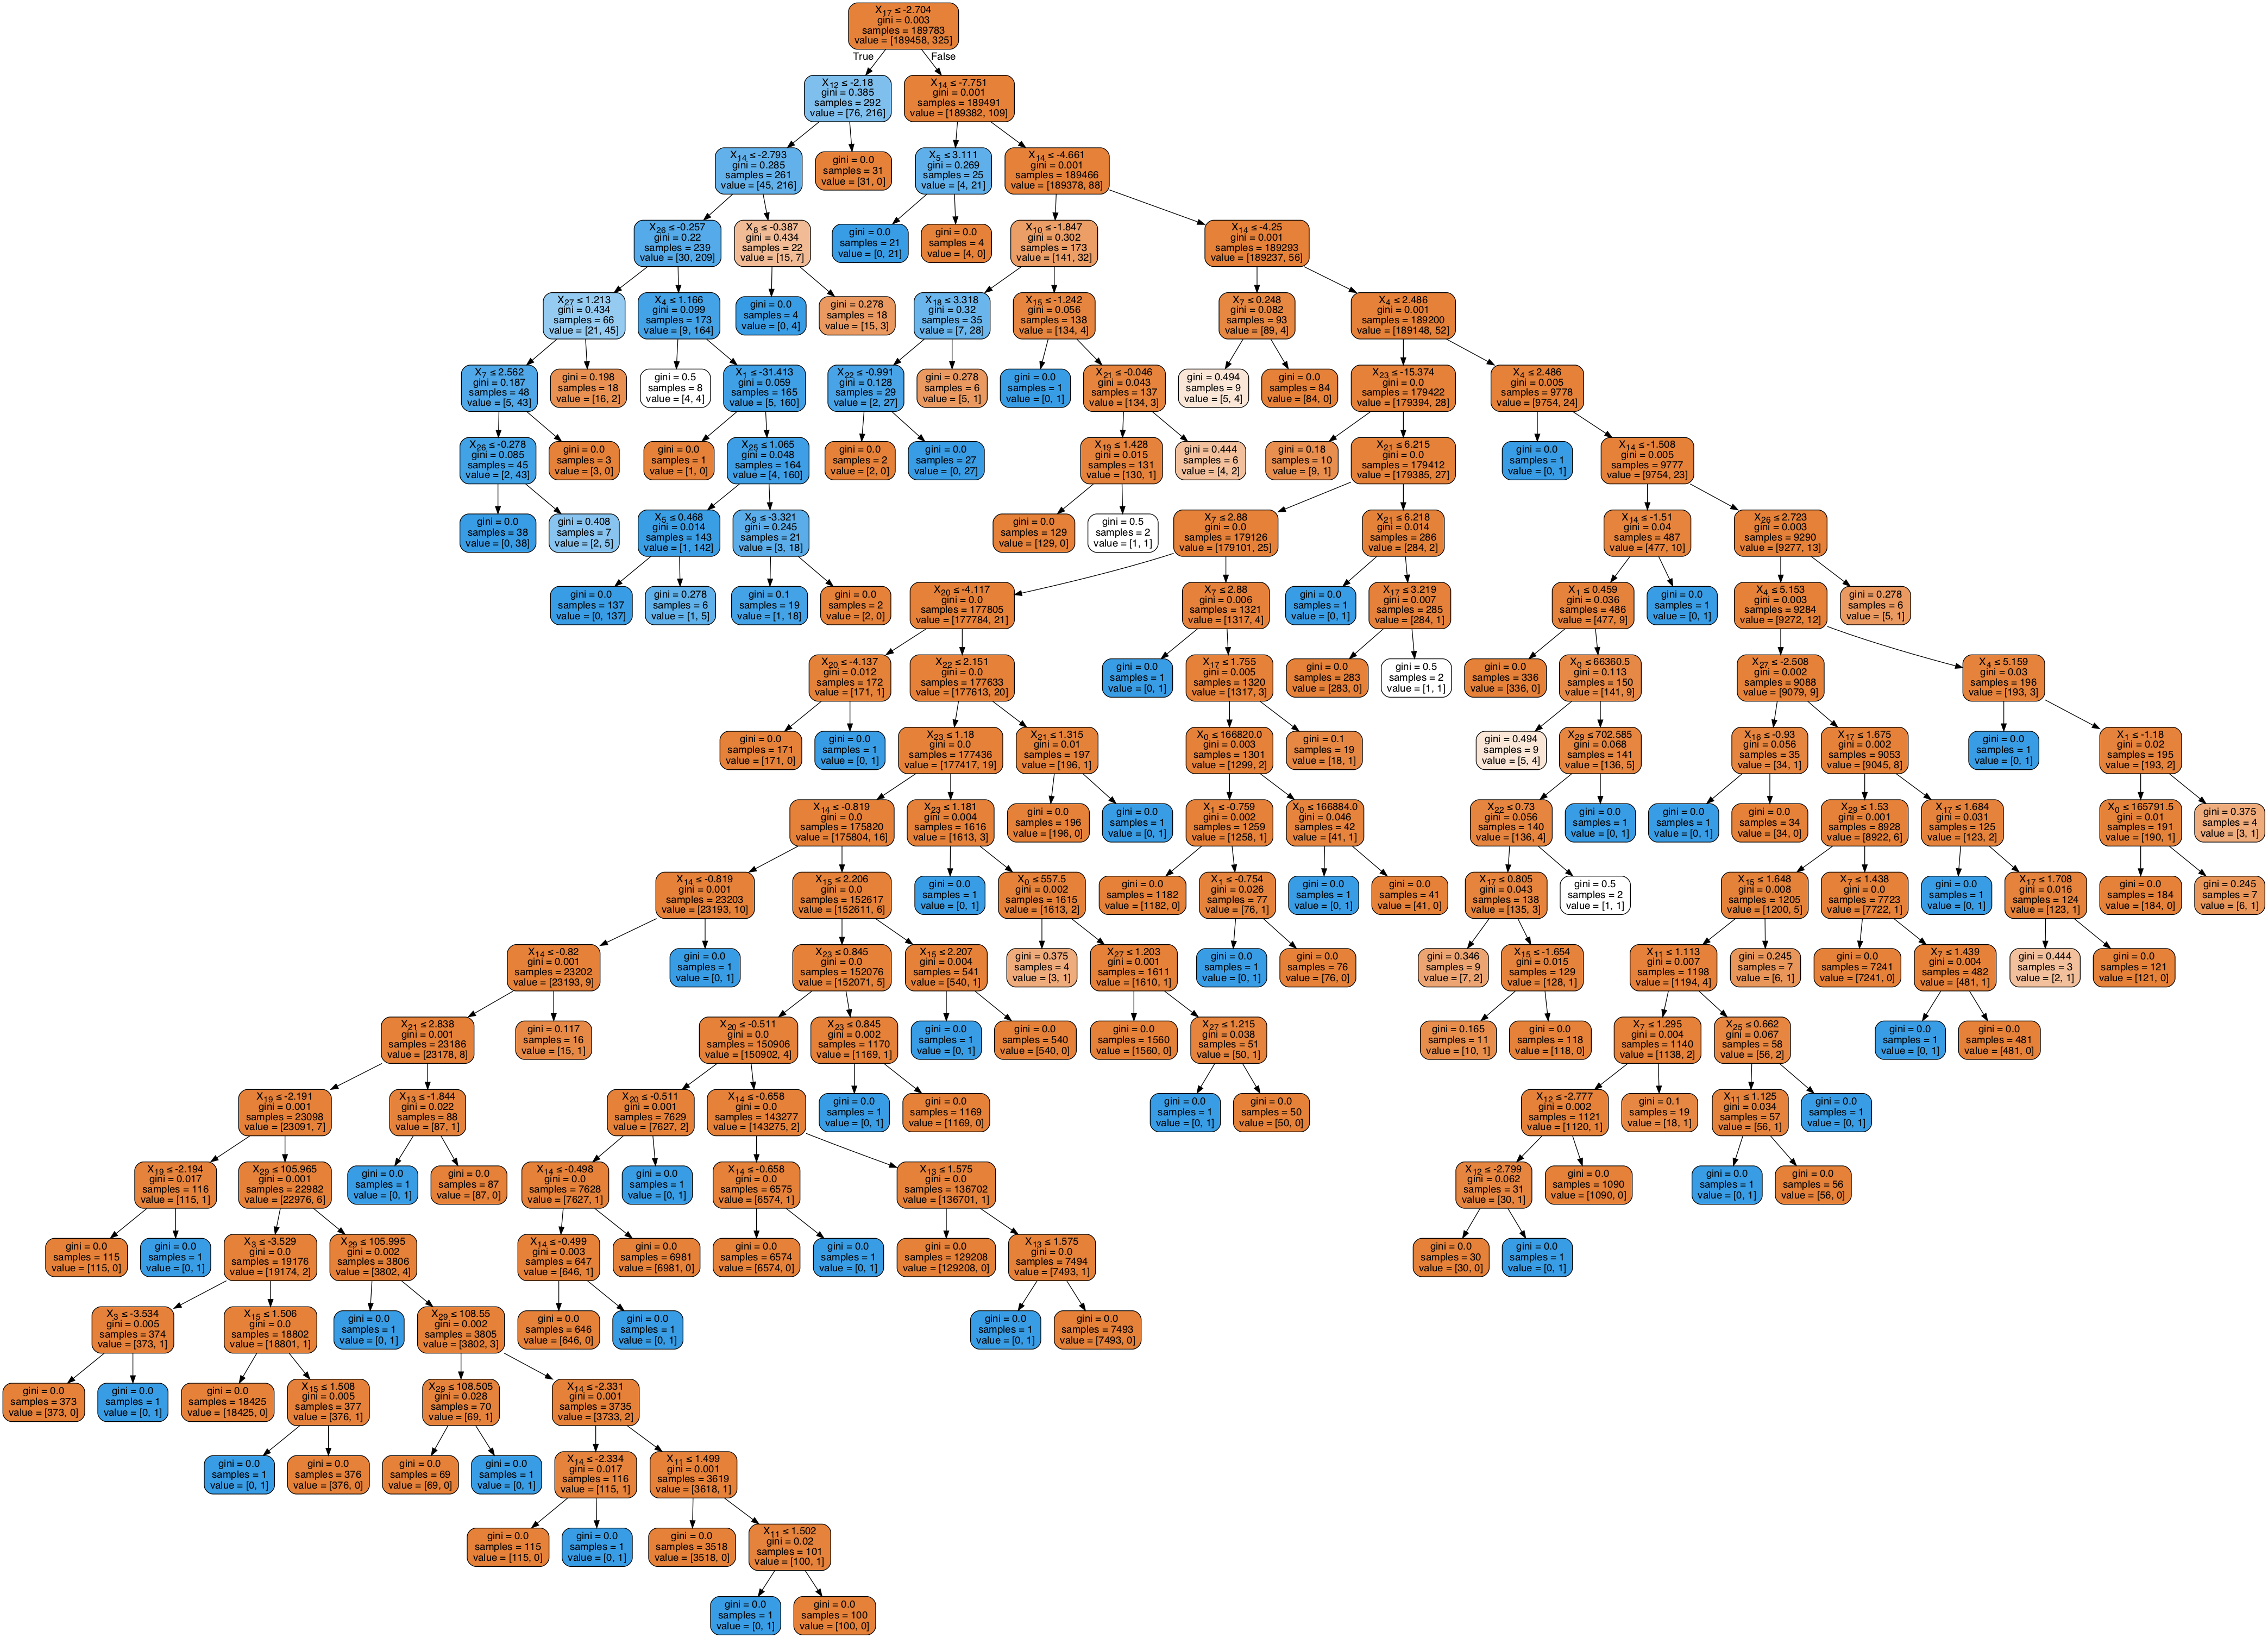

In [10]:
#DT + normal sample

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

#pip install pydotplus
#conda install graphviz


dot_data = StringIO()
export_graphviz(model_DecisionTree_v01, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

[[94825    32]
 [   38   129]]


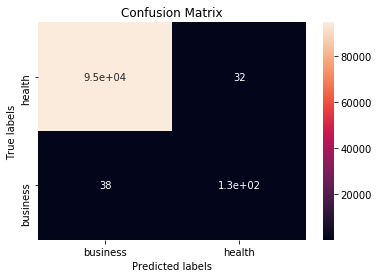

In [11]:
from sklearn.metrics import confusion_matrix

y_pred = model_DecisionTree_v01.predict(test[features])
y_true = list(test["Class"])

labels = [0, 1]
cm = confusion_matrix(y_true, y_pred, labels)
print(cm)
ax= plt.subplot()
sb.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);

In [12]:
from sklearn.metrics import roc_auc_score
AUC_ROC_SCORE = roc_auc_score(y_true, y_pred)

print(AUC_ROC_SCORE)

0.8860588699573558


In [13]:
#DT + Over sample

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=99)
X_resampled, y_resampled = ros.fit_resample(X, y)

print(len(X_resampled))
print(len(y_resampled))

model_DecisionTree_v02_overSample = DecisionTreeClassifier(min_samples_split=20, random_state=99)
model_DecisionTree_v02_overSample.fit(X_resampled, y_resampled)

y_pred_v02 = model_DecisionTree_v02_overSample.predict(test[features])
y_true = list(test["Class"])

AUC_ROC_SCORE_v02 = roc_auc_score(y_true, y_pred_v02)
print(AUC_ROC_SCORE_v02)

378916
378916
0.8829963337817234


In [14]:
#DT + Under sample
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=99)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(len(X_resampled))
print(len(y_resampled))

model_DecisionTree_v03_underSample = DecisionTreeClassifier(min_samples_split=20, random_state=99)
model_DecisionTree_v03_underSample.fit(X_resampled, y_resampled)

y_pred_v03 = model_DecisionTree_v03_underSample.predict(test[features])
y_true = list(test["Class"])

AUC_ROC_SCORE_v03 = roc_auc_score(y_true, y_pred_v03)
print(AUC_ROC_SCORE_v03)


650
650
0.9144813254669698


In [15]:
#DT + SMOTE Sample
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print(len(X_resampled))
print(len(y_resampled))

model_DecisionTree_v04_SMOTE = DecisionTreeClassifier(min_samples_split=20, random_state=99)
model_DecisionTree_v04_SMOTE.fit(X_resampled, y_resampled)

y_pred_v04 = model_DecisionTree_v04_SMOTE.predict(test[features])
y_true = list(test["Class"])

AUC_ROC_SCORE_v04 = roc_auc_score(y_true, y_pred_v04)
print(AUC_ROC_SCORE_v04)

378916
378916
0.9031742959572491


In [16]:
#Calculate Type I and Type II Error:

TP = cm[0,0]
FP = cm[0,1]
TN = cm[1,0]
FN = cm[1,1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

print(TPR, TNR, PPV, NPV, FPR, FNR, FDR)

#type I error is the rejection of a true null hypothesis (also known as a "false positive")
#type II error is the non-rejection of a false null hypothesis (also known as a "false negative")
print("TYPE  I ERROR:", FPR)
print("TYPE II ERROR:", FNR)

0.9986414474377067 0.5428571428571428 0.9996626500943525 0.2275449101796407 0.45714285714285713 0.001358552562293321 0.0003373499056474483
TYPE  I ERROR: 0.45714285714285713
TYPE II ERROR: 0.001358552562293321


In [17]:
############# Include a loss matrix to determine splits #############
#############Include a loss matrix to tune thredshold #############
# NA for python implementation, only available in R language

In [18]:
#################### Random Forest ######################

#Normal sample
from sklearn.ensemble import RandomForestClassifier

model_randomforest_v01 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
model_randomforest_v01.fit(X, y)

y_pred_random_forest_v01 = model_randomforest_v01.predict(test[features])
y_true = list(test["Class"])

AUC_ROC_SCORE_random_forest_v01 = roc_auc_score(y_true, y_pred_random_forest_v01)
print(AUC_ROC_SCORE_random_forest_v01)

0.7873249989473597


In [19]:
#RF + Over sample
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=99)
X_resampled, y_resampled = ros.fit_resample(X, y)

print(len(X_resampled))
print(len(y_resampled))

model_randomforest_v02 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
model_randomforest_v02.fit(X_resampled, y_resampled)

y_pred_random_forest_v02 = model_randomforest_v02.predict(test[features])
y_true = list(test["Class"])

AUC_ROC_SCORE_random_forest_v02 = roc_auc_score(y_true, y_pred_random_forest_v02)
print(AUC_ROC_SCORE_random_forest_v02)

378916
378916
0.9308373038546078


In [20]:
#RF + Under sample
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=99)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(len(X_resampled))
print(len(y_resampled))

model_randomforest_v03 = DecisionTreeClassifier(min_samples_split=20, random_state=99)
model_randomforest_v03.fit(X_resampled, y_resampled)

y_pred_random_forest_v03 = model_randomforest_v03.predict(test[features])
y_true = list(test["Class"])

AUC_ROC_SCORE_random_forest_v03 = roc_auc_score(y_true, y_pred_random_forest_v03)
print(AUC_ROC_SCORE_random_forest_v03)

650
650
0.9144813254669698


In [21]:
#RF + SMOTE Sample
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print(len(X_resampled))
print(len(y_resampled))

model_randomforest_v04 = DecisionTreeClassifier(min_samples_split=20, random_state=99)
model_randomforest_v04.fit(X_resampled, y_resampled)

y_pred_random_forest_v04 = model_randomforest_v04.predict(test[features])
y_true = list(test["Class"])

AUC_ROC_SCORE_random_forest_v04 = roc_auc_score(y_true, y_pred_random_forest_v04)
print(AUC_ROC_SCORE_random_forest_v04)

378916
378916
0.9031742959572491


In [22]:
import random

#如果不加random.seed(888)，那么输出总是不同的random number，导致实验不可复现。
#random.seed(888)
for x in range(10):
    print(random.randint(1,101))

print('')
#如果加了下面1行，那么输出总是相同的random number。
random.seed(888)
for x in range(10):
    print(random.randint(1,101))

28
7
68
20
72
74
24
81
18
93

11
56
75
57
64
50
81
48
70
54


In [23]:
#SVM version
#SVM + normal sampling
from sklearn.svm import SVC

print(len(X))
print(len(y))

#sklearn.svm.SVC()
#全称是C-Support Vector Classification，是一种基于libsvm的支持向量机，由于其时间复杂度为O(n^2)，所以当样本数量超过两万时难以实现。
#而这个dataset里面有将近20万个sample，所以很慢。
#太慢，这是很大的缺点，
#model_SVM_v01 = SVC(gamma='auto')
#model_SVM_v01.fit(X, y)

#y_pred_SVM_v01 = model_SVM_v01.predict(test[features])
#y_true = list(test["Class"])

#AUC_ROC_SCORE_SVM_v01 = roc_auc_score(y_true, y_pred_SVM_v01)
#print(AUC_ROC_SCORE_SVM_v01)

189783
189783


In [27]:
#LinearSVC version
#LinearSVC + normal sampling

#From this example, we can see that even LinearSVC have difficuty to make the final converge, 
#because such large of the dataset, we can try to increase iterate times to make converge, 
# the SVM is hard to find hyperplate in high dimention space.

from sklearn.svm import LinearSVC

print(len(X))
print(len(y))

#sklearn.svm.LinearSVC()
#In scikit SVC and nuSVC are mathematically equivalent with both methods based on the library libsvm. 
#The main difference is that SVC uses the parameter C while nuSVC uses the parameter nu.

#LinearSVC is based on the library liblinear. 
#As the documentation says, LinearSVC is similar to SVC with parameter kernel='linear', 
#but liblinear offers more penalties and loss functions in order to scale better with large numbers of samples. 

model_LinearSVC_v01 = LinearSVC(random_state=0, tol=1e-5, max_iter=1000, penalty='l2')
model_LinearSVC_v01.fit(X, y)

y_pred_LinearSVC_v01 = model_LinearSVC_v01.predict(test[features])
y_true = list(test["Class"])

AUC_ROC_SCORE_LinearSVC_v01 = roc_auc_score(y_true, y_pred_LinearSVC_v01)
print(AUC_ROC_SCORE_LinearSVC_v01)

189783
189783
0.568799022341793


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [28]:
#LinearSVC + Over sample
#From this example, we can see that even LinearSVC have difficuty to make the final converge, 
#because such large of the dataset

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=99)
X_resampled, y_resampled = ros.fit_resample(X, y)

print(len(X_resampled))
print(len(y_resampled))

model_LinearSVC_v02 = LinearSVC(random_state=0, tol=1e-5, max_iter=1000, penalty='l2')
model_LinearSVC_v02.fit(X, y)

y_pred_LinearSVC_v02 = model_LinearSVC_v02.predict(test[features])
y_true = list(test["Class"])

AUC_ROC_SCORE_LinearSVC_v02 = roc_auc_score(y_true, y_pred_LinearSVC_v02)
print(AUC_ROC_SCORE_LinearSVC_v02)

378916
378916
0.6524574116260348


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [29]:
#LinearSVC + Under sample
#From this example, we can see that even LinearSVC have difficuty to make the final converge, 
#because such large of the dataset
#even we reduced the number of records within dataset.

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=99)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(len(X_resampled))
print(len(y_resampled))

model_LinearSVC_v03 = LinearSVC(random_state=0, tol=1e-5, max_iter=1000, penalty='l2')
model_LinearSVC_v03.fit(X, y)

y_pred_LinearSVC_v03 = model_LinearSVC_v03.predict(test[features])
y_true = list(test["Class"])

AUC_ROC_SCORE_LinearSVC_v03 = roc_auc_score(y_true, y_pred_LinearSVC_v03)
print(AUC_ROC_SCORE_LinearSVC_v03)

650
650
0.6524574116260348


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [30]:
#LinearSVC + SMOTE Sample
#From this example, we can see that even LinearSVC have difficuty to make the final converge, 
#because such large of the dataset

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print(len(X_resampled))
print(len(y_resampled))

model_LinearSVC_v04 = LinearSVC(random_state=0, tol=1e-5, max_iter=1000, penalty='l2')
model_LinearSVC_v04.fit(X, y)

y_pred_LinearSVC_v04 = model_LinearSVC_v04.predict(test[features])
y_true = list(test["Class"])

AUC_ROC_SCORE_LinearSVC_v04 = roc_auc_score(y_true, y_pred_LinearSVC_v04)
print(AUC_ROC_SCORE_LinearSVC_v04)

378916
378916
0.6524574116260348


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:

#I need to further try neurnal network in this case, because PCA scaled value is perfect for neural network to fit & learn.